In [1]:
import argparse
import model
from keras.models import load_model
import cv2
import subprocess
import numpy as np
import matplotlib.pyplot as plt

/home/jiman/.pyenv/versions/anaconda2-5.0.1/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def prepare_image(img):
    img = cv2.resize(img, (224, 224))
    img = img.astype(np.float32)
    mean = np.array([103.939, 116.779, 123.68], dtype=np.float32).reshape(1, 1, 3)
    img -= mean 
    return img

def predict_core(face_model, img_np_mat):
    img = prepare_image(img_np_mat)
    predicted = face_model.predict(np.array([img]))
    pre_num = np.array([predicted[0][i]*i for i in range(101)])        
    return np.sum(pre_num)


In [3]:
!ls /home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv*
#!ls /Users/saboten/data/imdb_face_vgg_all/imdb_224_all-cv*

/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-0.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-10.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-100.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1000.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1001.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1002.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1003.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1004.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1005.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1006.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1007.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1008.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1009.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-101.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1010.npz
/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv

In [30]:
np_mat0 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-0.npz')

In [31]:
img, age,gender = np_mat0['image'], np_mat0['age'], np_mat0['gender']

In [12]:
img.shape

(32, 224, 224, 3)

In [13]:
age.shape

(32,)

In [4]:
face_model = load_model('/home/jiman/mljob/face_age_vgg_face_20180213_202347/checkpoint.03.hdf5', compile=False)
#face_model = load_model('/Users/saboten/mljob/face_age_vgg_face_20180213_202347/checkpoint.03.hdf5', compile=False)
model.compile_model(face_model, learning_rate=0.001)

In [5]:
def prepare_image(img):
    img = cv2.resize(img, (224, 224))
    img = img.astype(np.float32)
    mean = np.array([103.939, 116.779, 123.68], dtype=np.float32).reshape(1, 1, 3)
    img -= mean 
    return img

def predict_core(face_model, img_np_mat):
    img = prepare_image(img_np_mat)
    predicted = face_model.predict(np.array([img]))
    pre_num = np.array([predicted[0][i]*i for i in range(101)])        
    return np.sum(pre_num)

In [28]:
def error_and_showimg(img, age, gender):
    fig = plt.figure(figsize=(16, 16))
    columns = 8
    rows = 4
    count = 0
    for i in range(1, columns*rows+1):
        pre_im = prepare_image(img[i-1])
        pred_age = int(np.abs(predict_core(face_model, pre_im)))
        age_diff = np.abs(age[i-1]-pred_age)
        if age_diff > 10.0:
            count += 1
            fig.add_subplot(rows, columns, i)
            plt.imshow(cv2.cvtColor(img[i-1], cv2.COLOR_BGR2RGB))
            plt.title('e=%s,r=%s,p=%s,\ng=%s' % (age_diff,age[i-1], pred_age, gender[i-1]))
            plt.axis('off')
    plt.show()
    print(count)

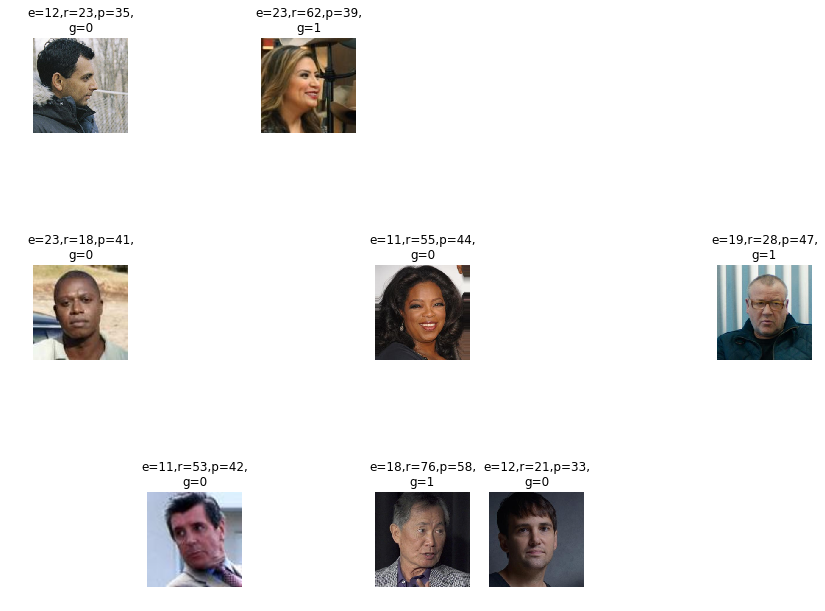

8


In [32]:
error_and_showimg(img, age, gender)

In [79]:
np_mat1 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1.npz')
img1, age1,gender1 = np_mat1['image'], np_mat1['age'], np_mat1['gender']

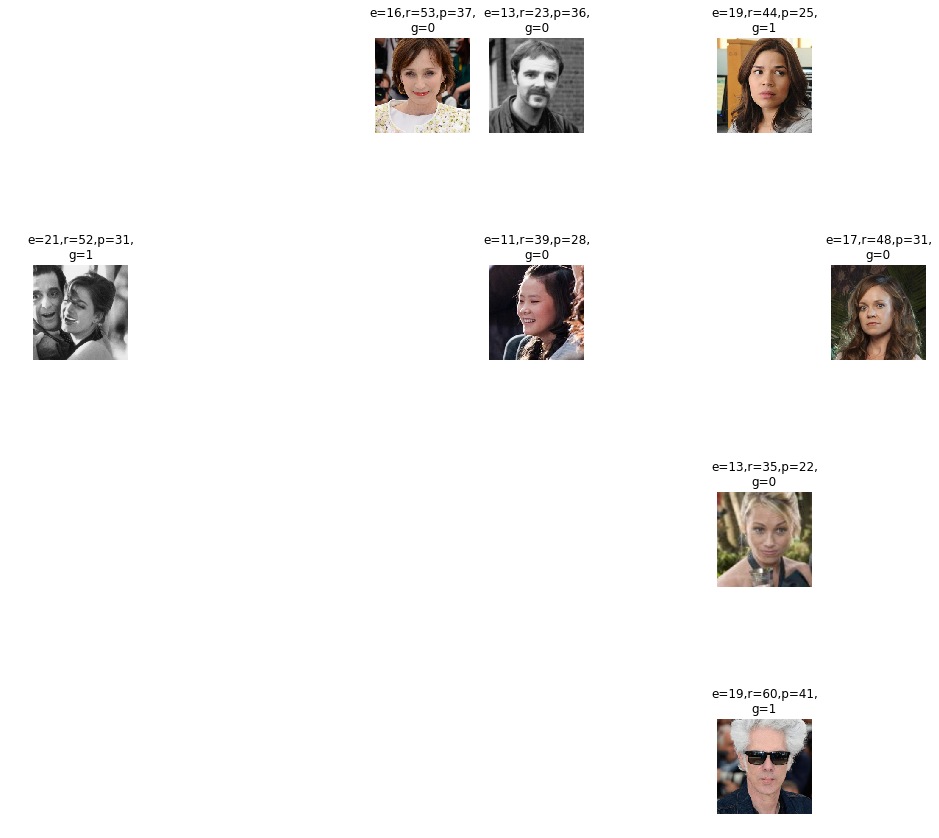

In [80]:
error_and_showimg(img1, age1, gender1)

In [81]:
np_mat2 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-2.npz')
img2, age2,gender2 = np_mat2['image'], np_mat2['age'], np_mat2['gender']

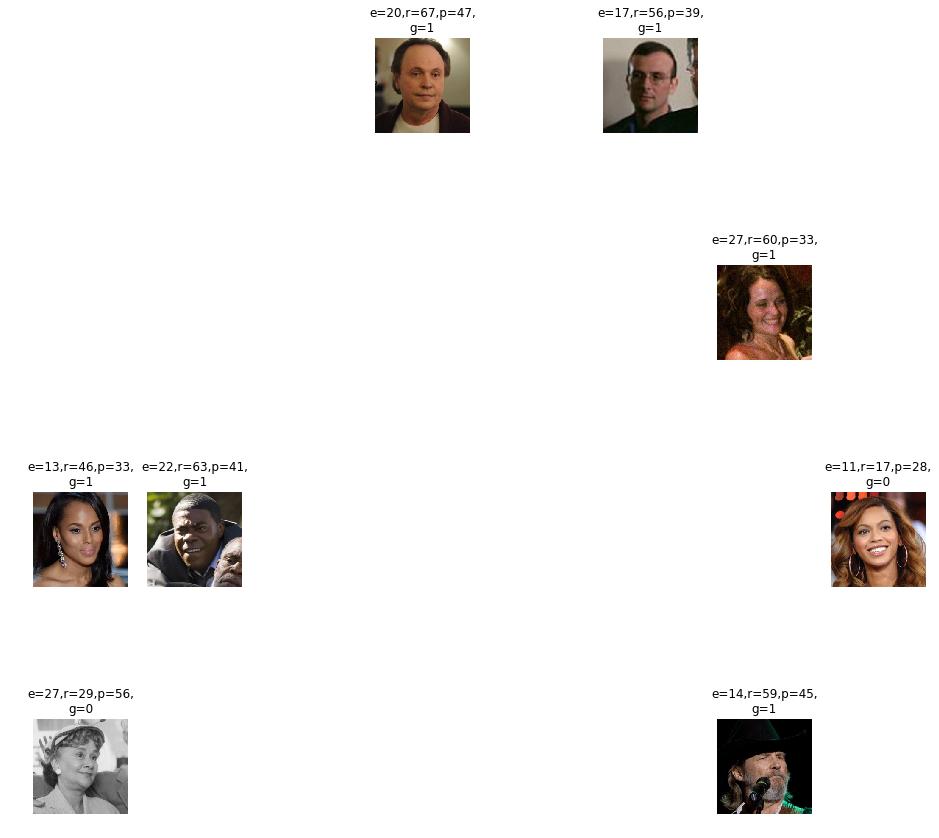

In [82]:
error_and_showimg(img2, age2, gender2)

In [5]:
np_mat3 = np.load('/Users/saboten/data/imdb_face_vgg_all/imdb_224_all-cv-10.npz')
img3, age3,gender3 = np_mat3['image'], np_mat3['age'], np_mat3['gender']

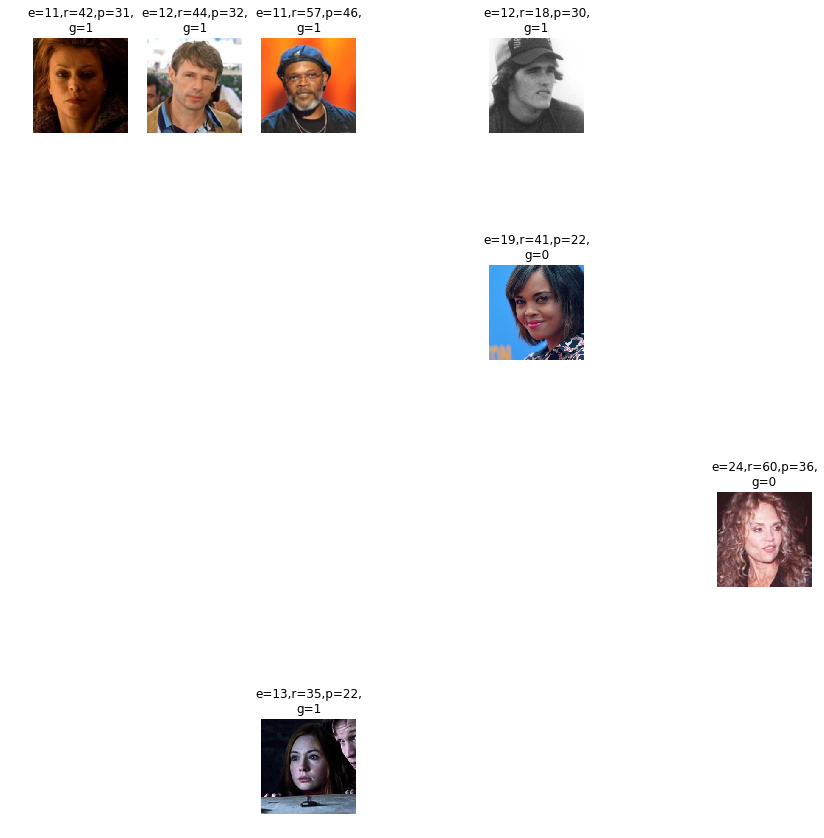

In [13]:
error_and_showimg(img3, age3, gender3)

In [7]:
np_mat100 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-100.npz')
img100, age100,gender100 = np_mat100['image'], np_mat100['age'], np_mat100['gender']

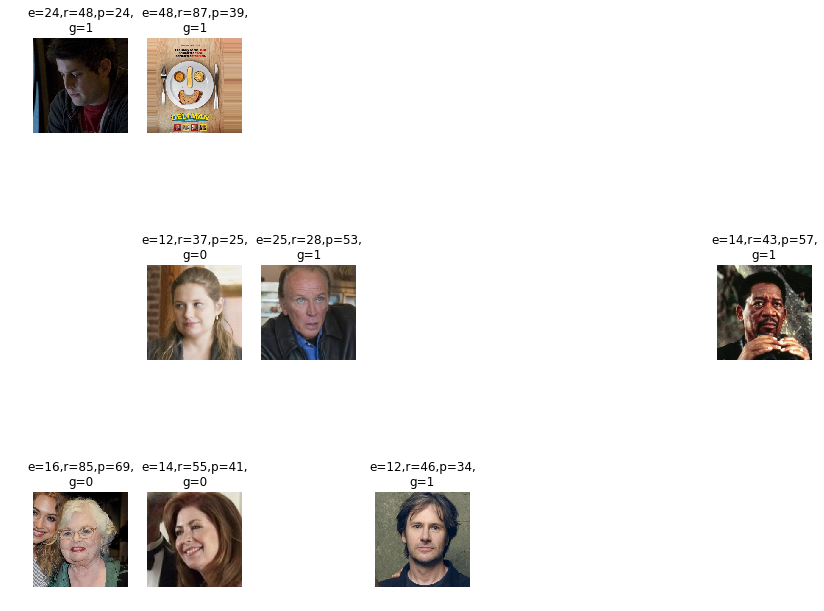

In [8]:
error_and_showimg(img100, age100, gender100)

In [12]:
np_mat1000 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1000.npz')
img1000, age1000,gender1000 = np_mat1000['image'], np_mat1000['age'], np_mat1000['gender']

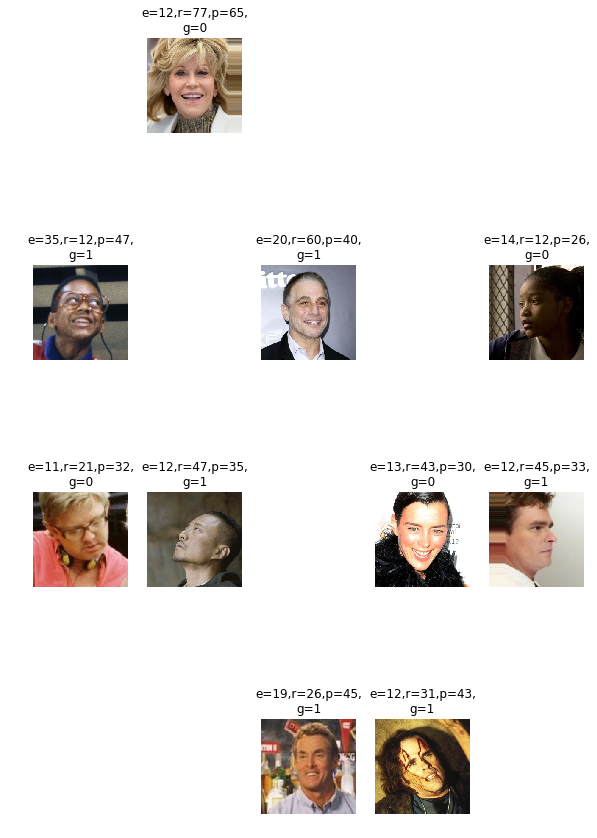

In [13]:
error_and_showimg(img1000, age1000, gender1000)

In [14]:
np_mat1001 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1001.npz')
img1001, age1001,gender1001 = np_mat1001['image'], np_mat1001['age'], np_mat1001['gender']

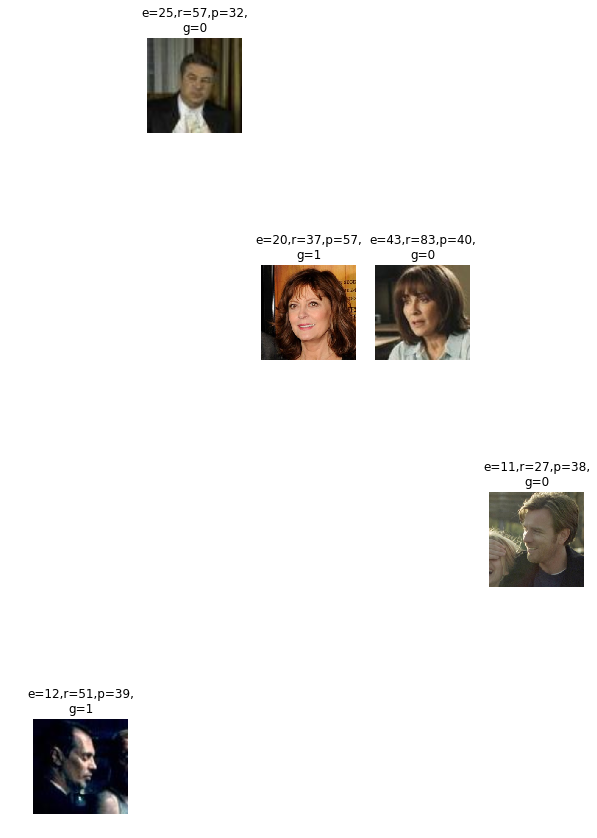

In [15]:
error_and_showimg(img1001, age1001, gender1001)

In [16]:
np_mat1002 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1002.npz')
img1002, age1002,gender1002 = np_mat1002['image'], np_mat1002['age'], np_mat1002['gender']

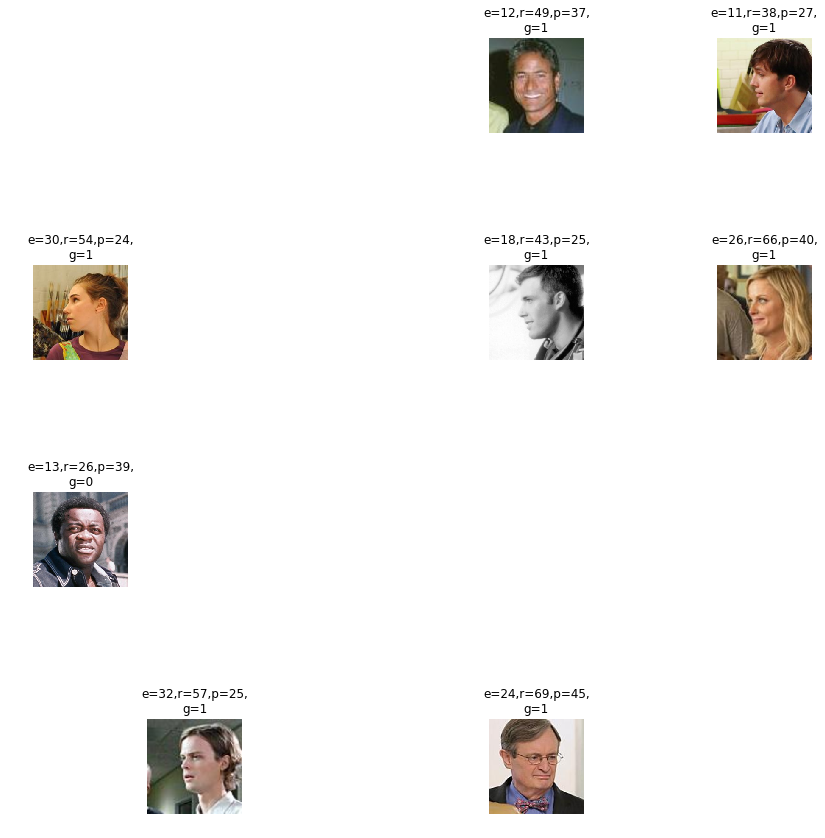

In [17]:
error_and_showimg(img1002, age1002, gender1002)

In [18]:
np_mat1003 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1003.npz')
img1003, age1003,gender1003 = np_mat1003['image'], np_mat1003['age'], np_mat1003['gender']

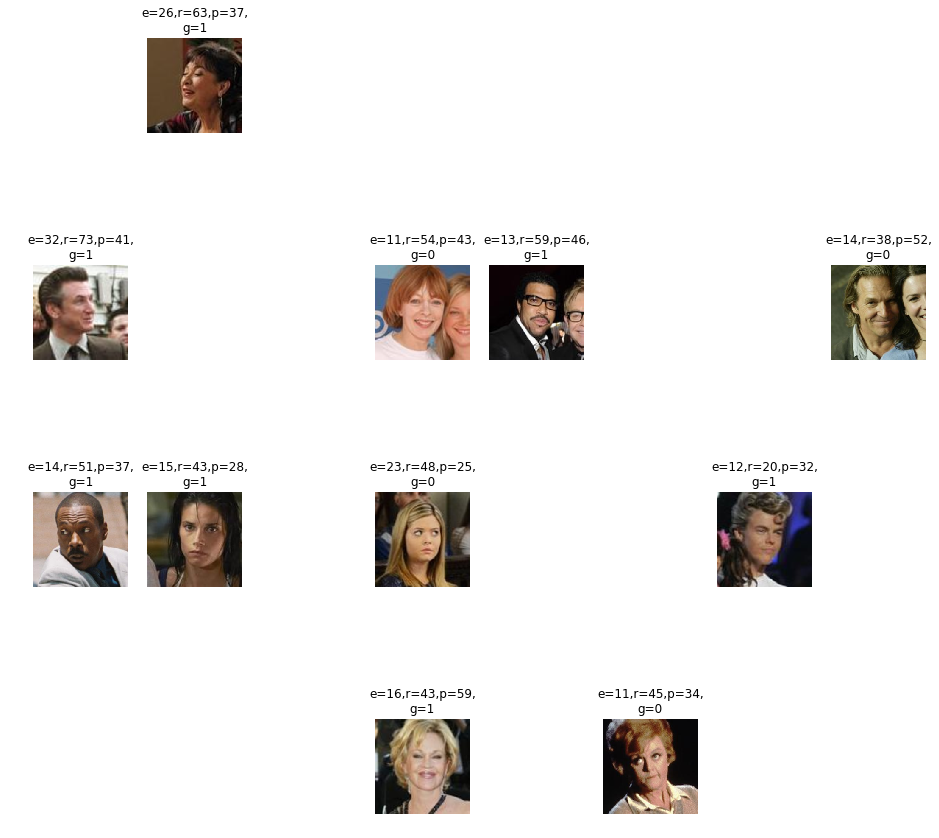

In [19]:
error_and_showimg(img1003, age1003, gender1003)

In [20]:
np_mat1004 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1004.npz')
img1004, age1004,gender1004 = np_mat1004['image'], np_mat1004['age'], np_mat1004['gender']

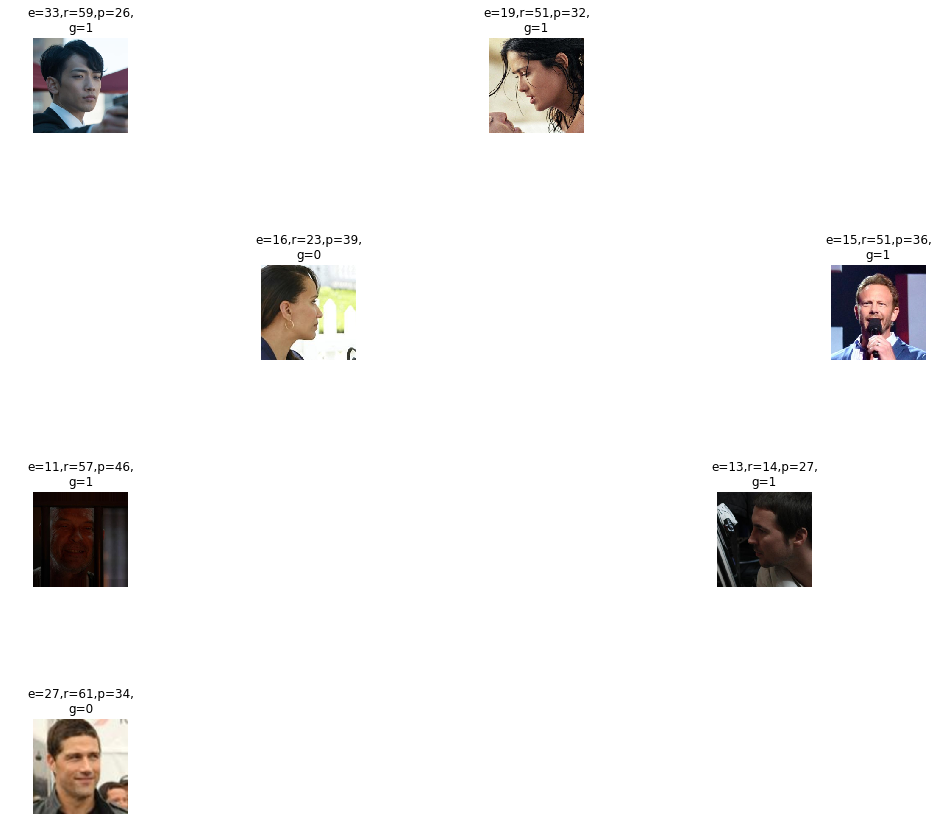

In [21]:
error_and_showimg(img1004, age1004, gender1004)

In [22]:
np_mat1005 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1005.npz')
img1005, age1005,gender1005 = np_mat1005['image'], np_mat1005['age'], np_mat1005['gender']

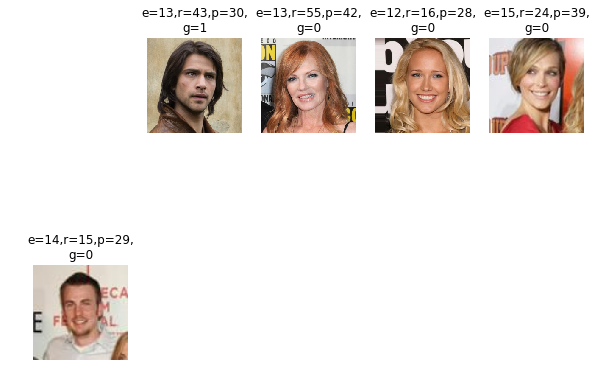

In [23]:
error_and_showimg(img1005, age1005, gender1005)

In [24]:
np_mat1006 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1006.npz')
img1006, age1006,gender1006 = np_mat1006['image'], np_mat1006['age'], np_mat1006['gender']

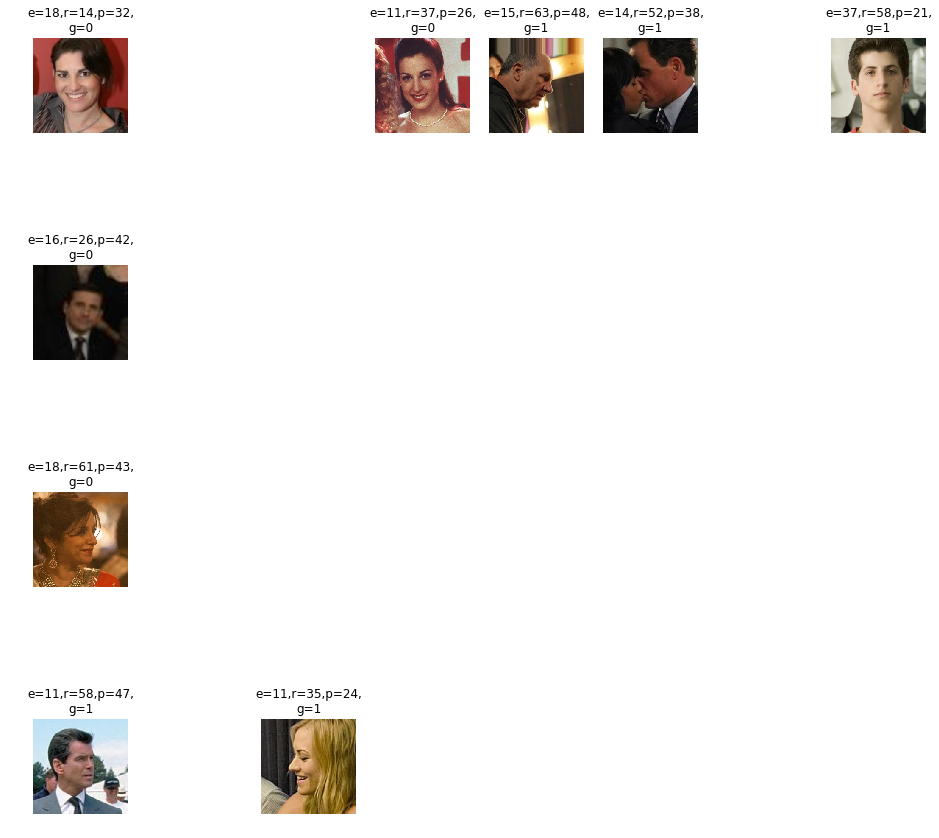

In [25]:
error_and_showimg(img1006, age1006, gender1006)

In [26]:
np_mat1007 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1007.npz')
img1007, age1007,gender1007 = np_mat1007['image'], np_mat1007['age'], np_mat1007['gender']

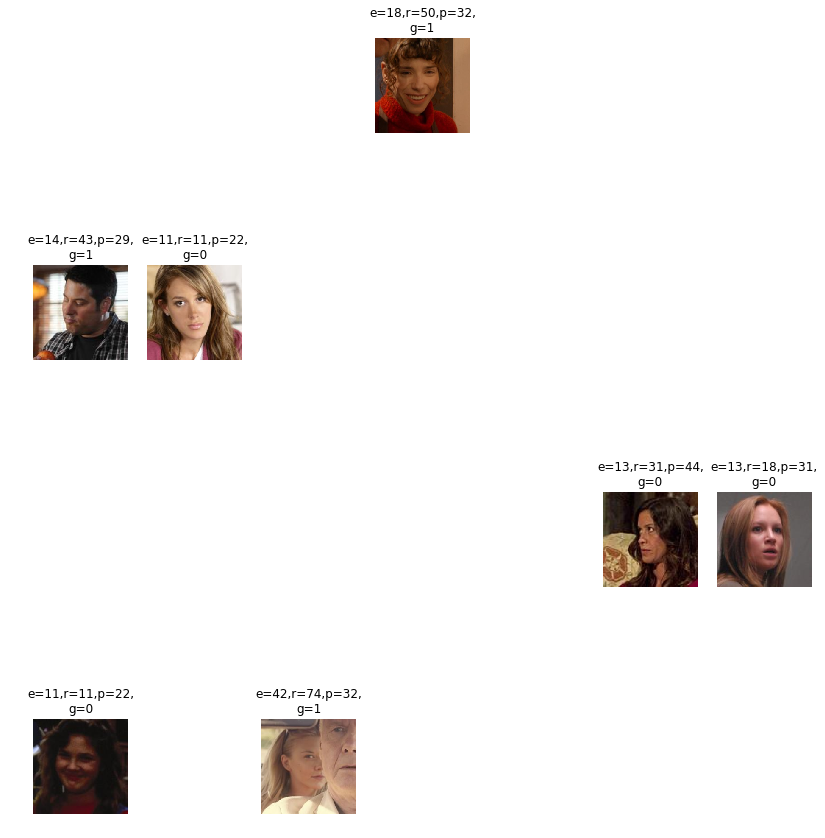

In [27]:
error_and_showimg(img1007, age1007, gender1007)

In [33]:
over10_age_list = [23,
62,
18,
55,
28,
53,
76,
21,
53,
23,
44,
52,
39,
48,
35,
60,
67,
56,
60,
46,
63,
17,
29,
59,
42,
44,
57,
18,
41,
60,
35,
48,
87,
37,
28,
43,
85,
55,
46,
77,
12,
60,
12,
21,
47,
43,
45,
26,
31,
57,
37,
83,
27,
51,
49,
38,
54,
43,
66,
26,
57,
69,
63,
73,
54,
59,
38,
51,
43,
48,
20,
43,
45,
59,
51,
51,
23,
57,
14,
61,
43,
55,
16,
24,
15,
14,
37,
63,
52,
58,
26,
61,
58,
35,
50,
43,
11,
31,
18,
11,
74]

In [34]:
age10_np = np.array(over10_age_list)

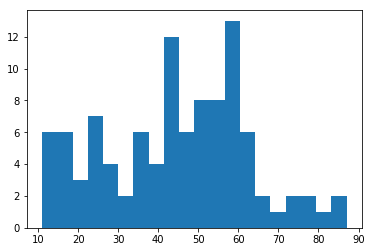

In [37]:
plt.hist(age10_np,bins=20)
plt.show()

データオーグメント
顔の向き